# Team 403 CIS 515 Final Project

In [ ]:
!nvidia-smi

Wed Apr 24 20:43:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              43W / 400W |      5MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 29.8/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SJDR1Y4uPqSkN9jMf5TK")
project = rf.workspace("cis515-ozzwn").project("cis-515-final-project")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/CIS-515-Final-Project-1/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_wi

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


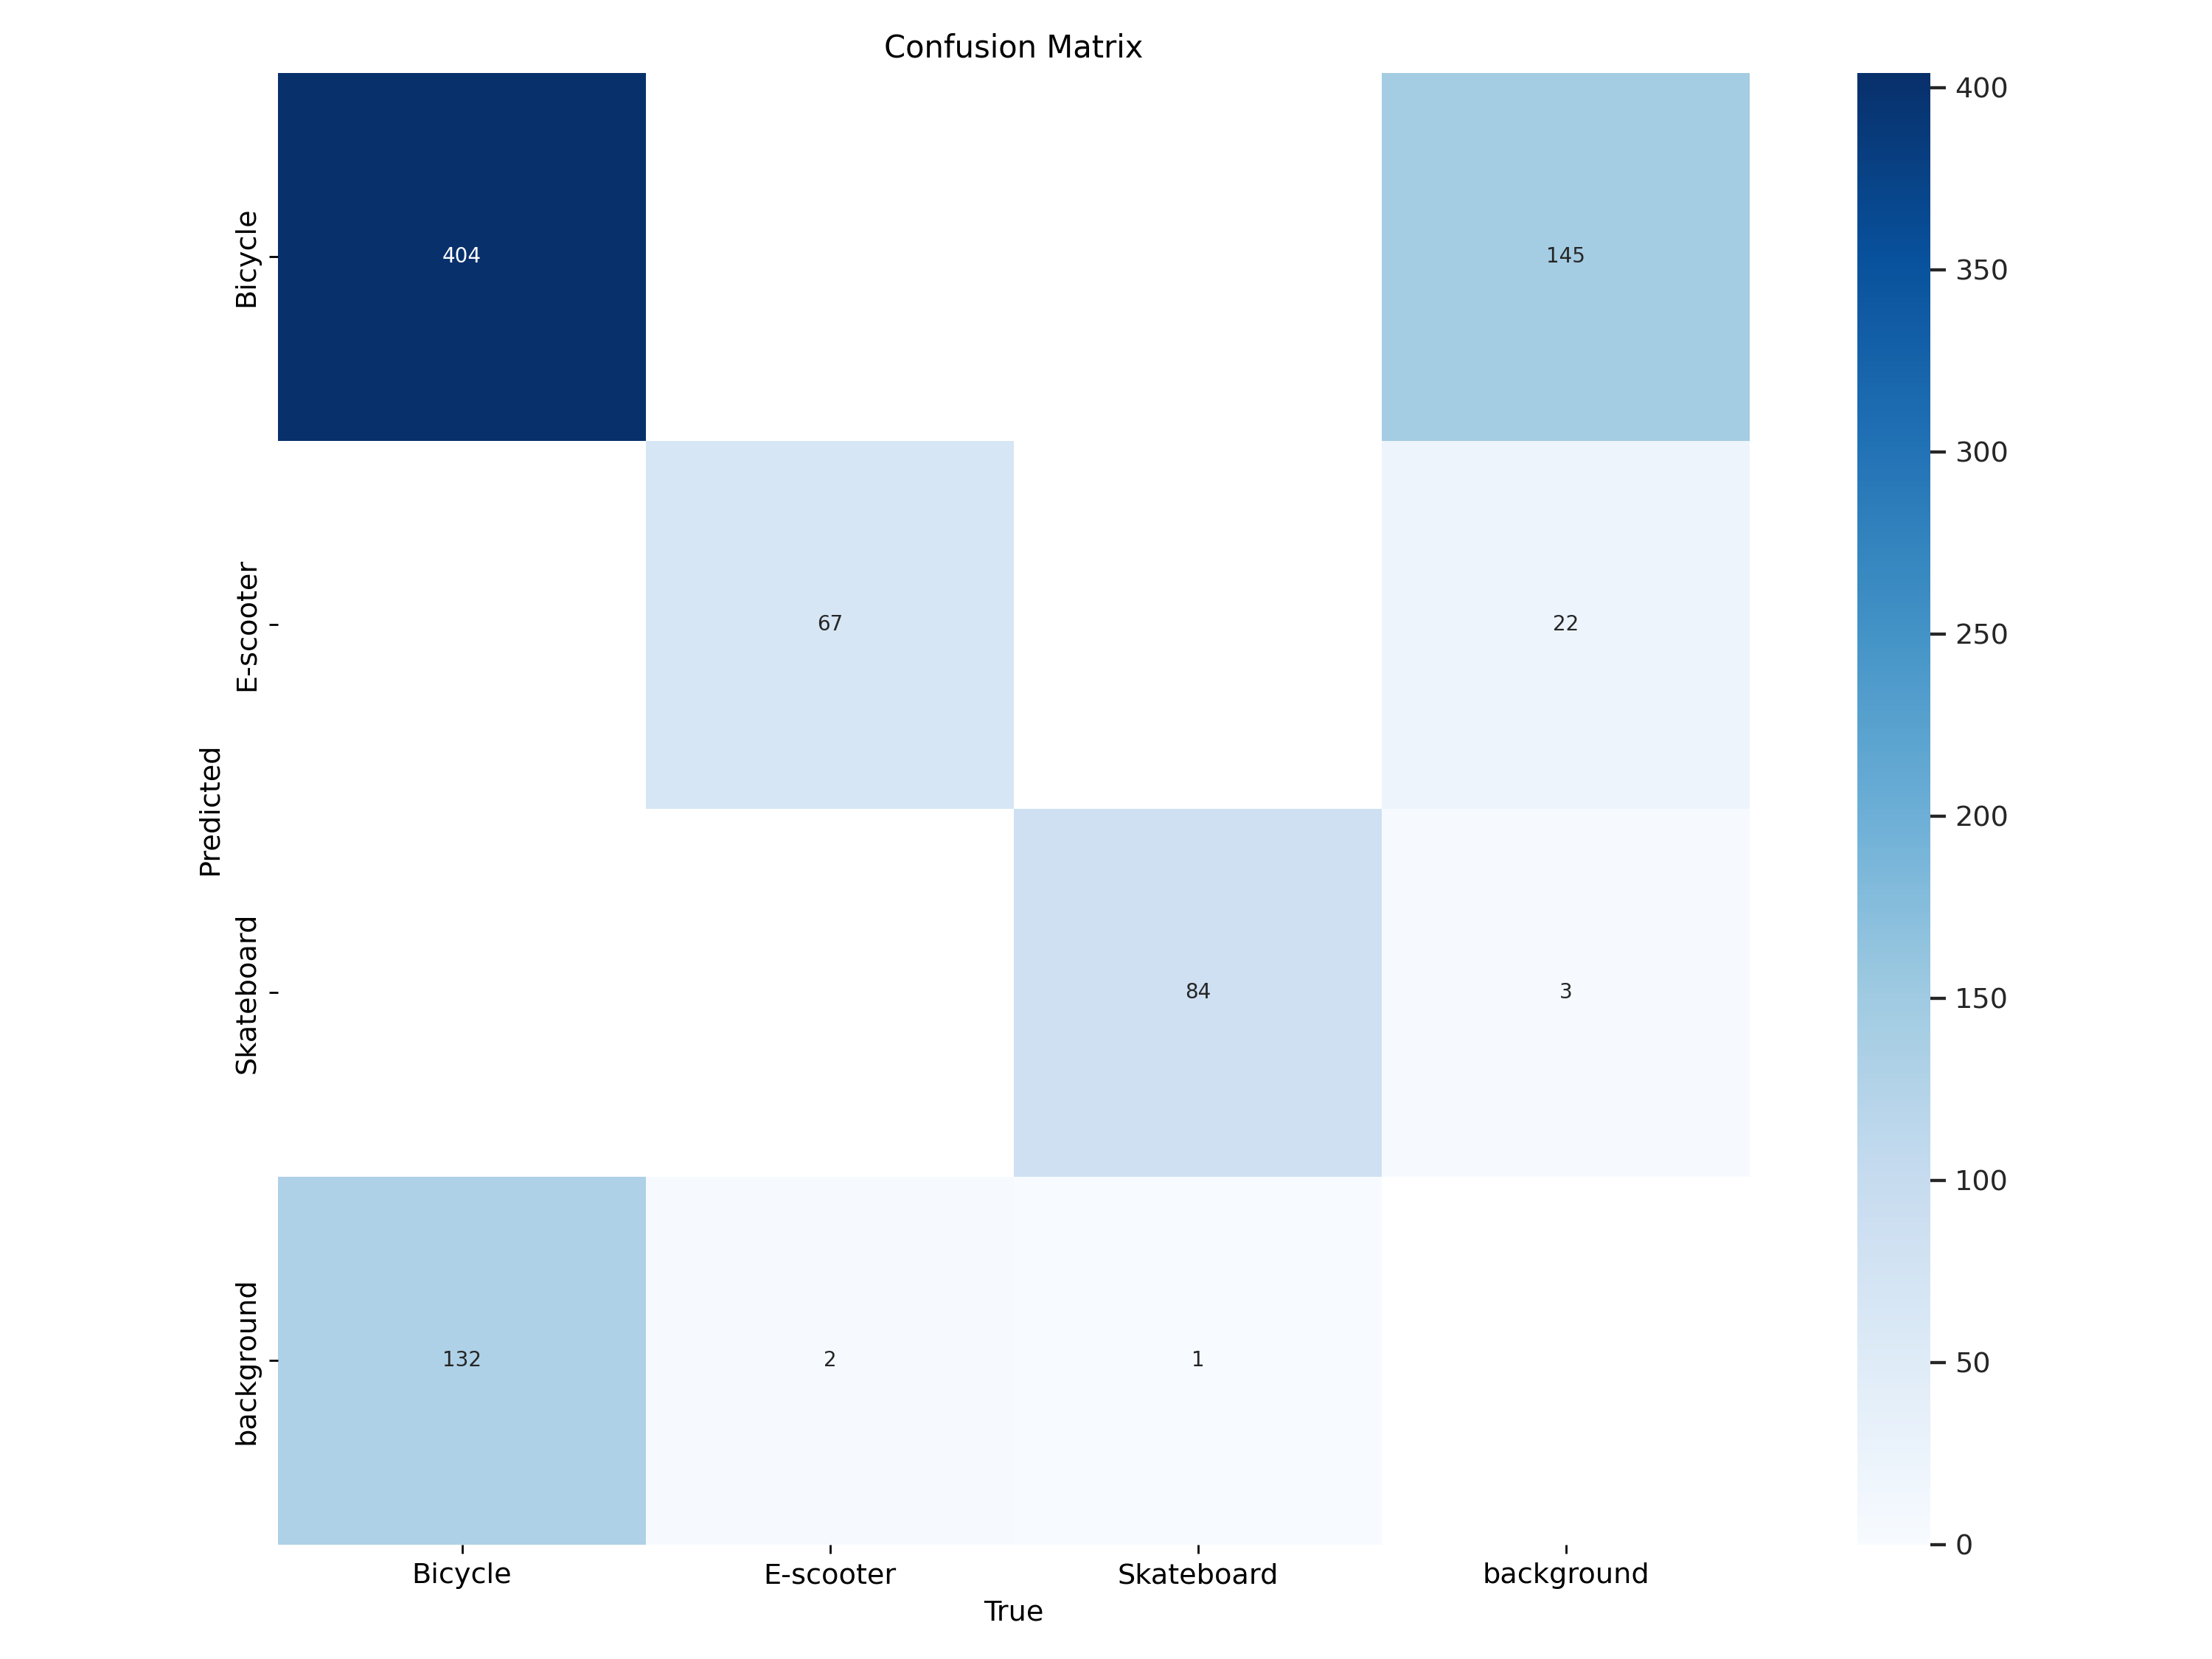

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


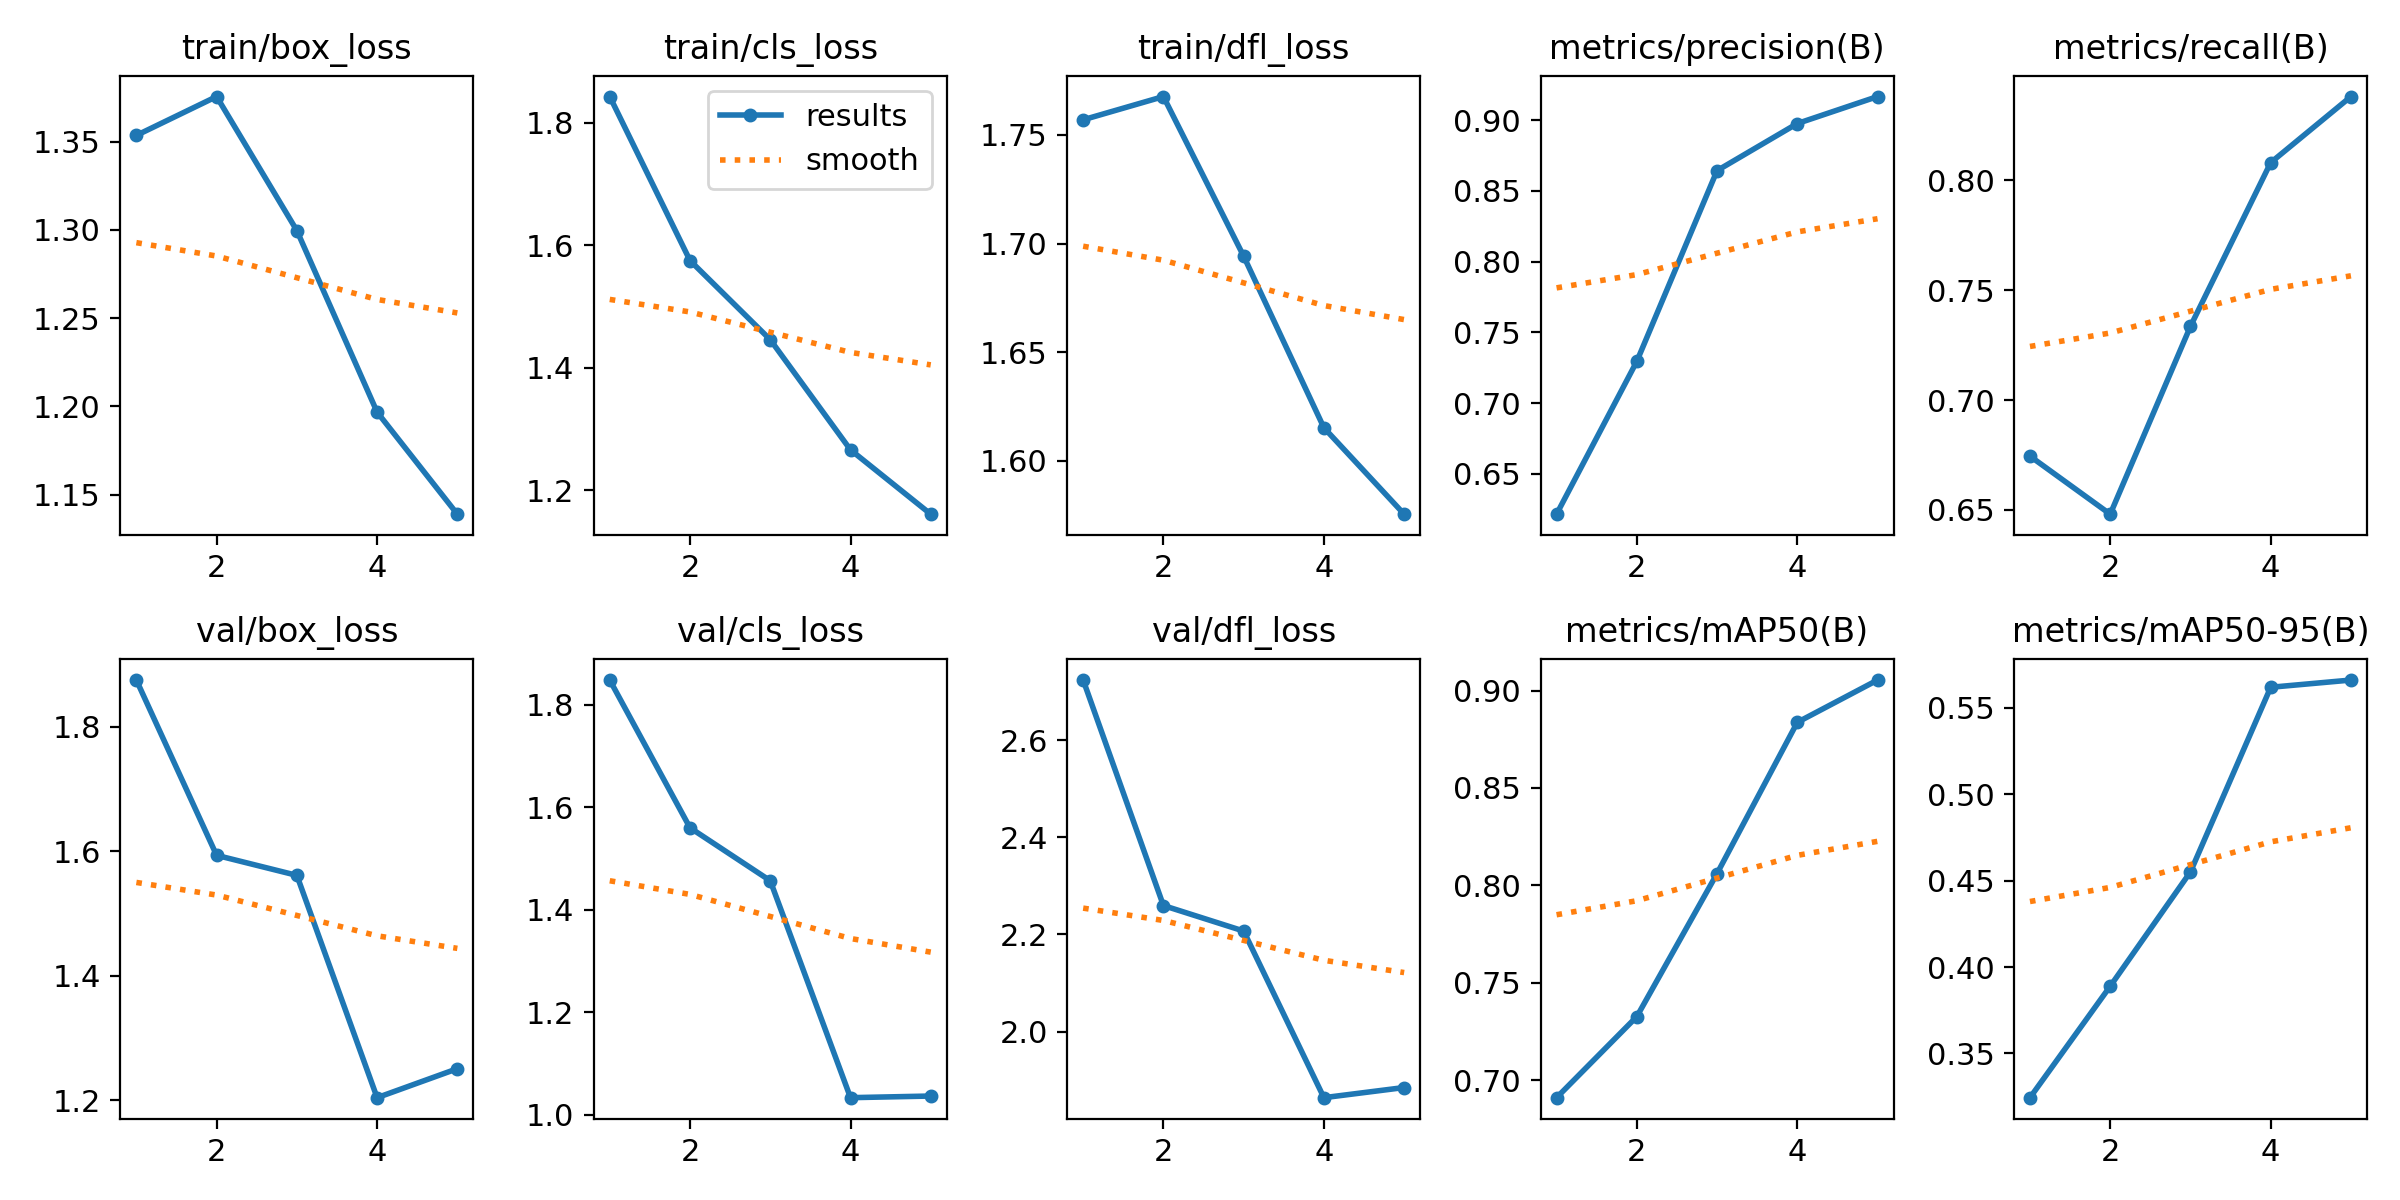

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


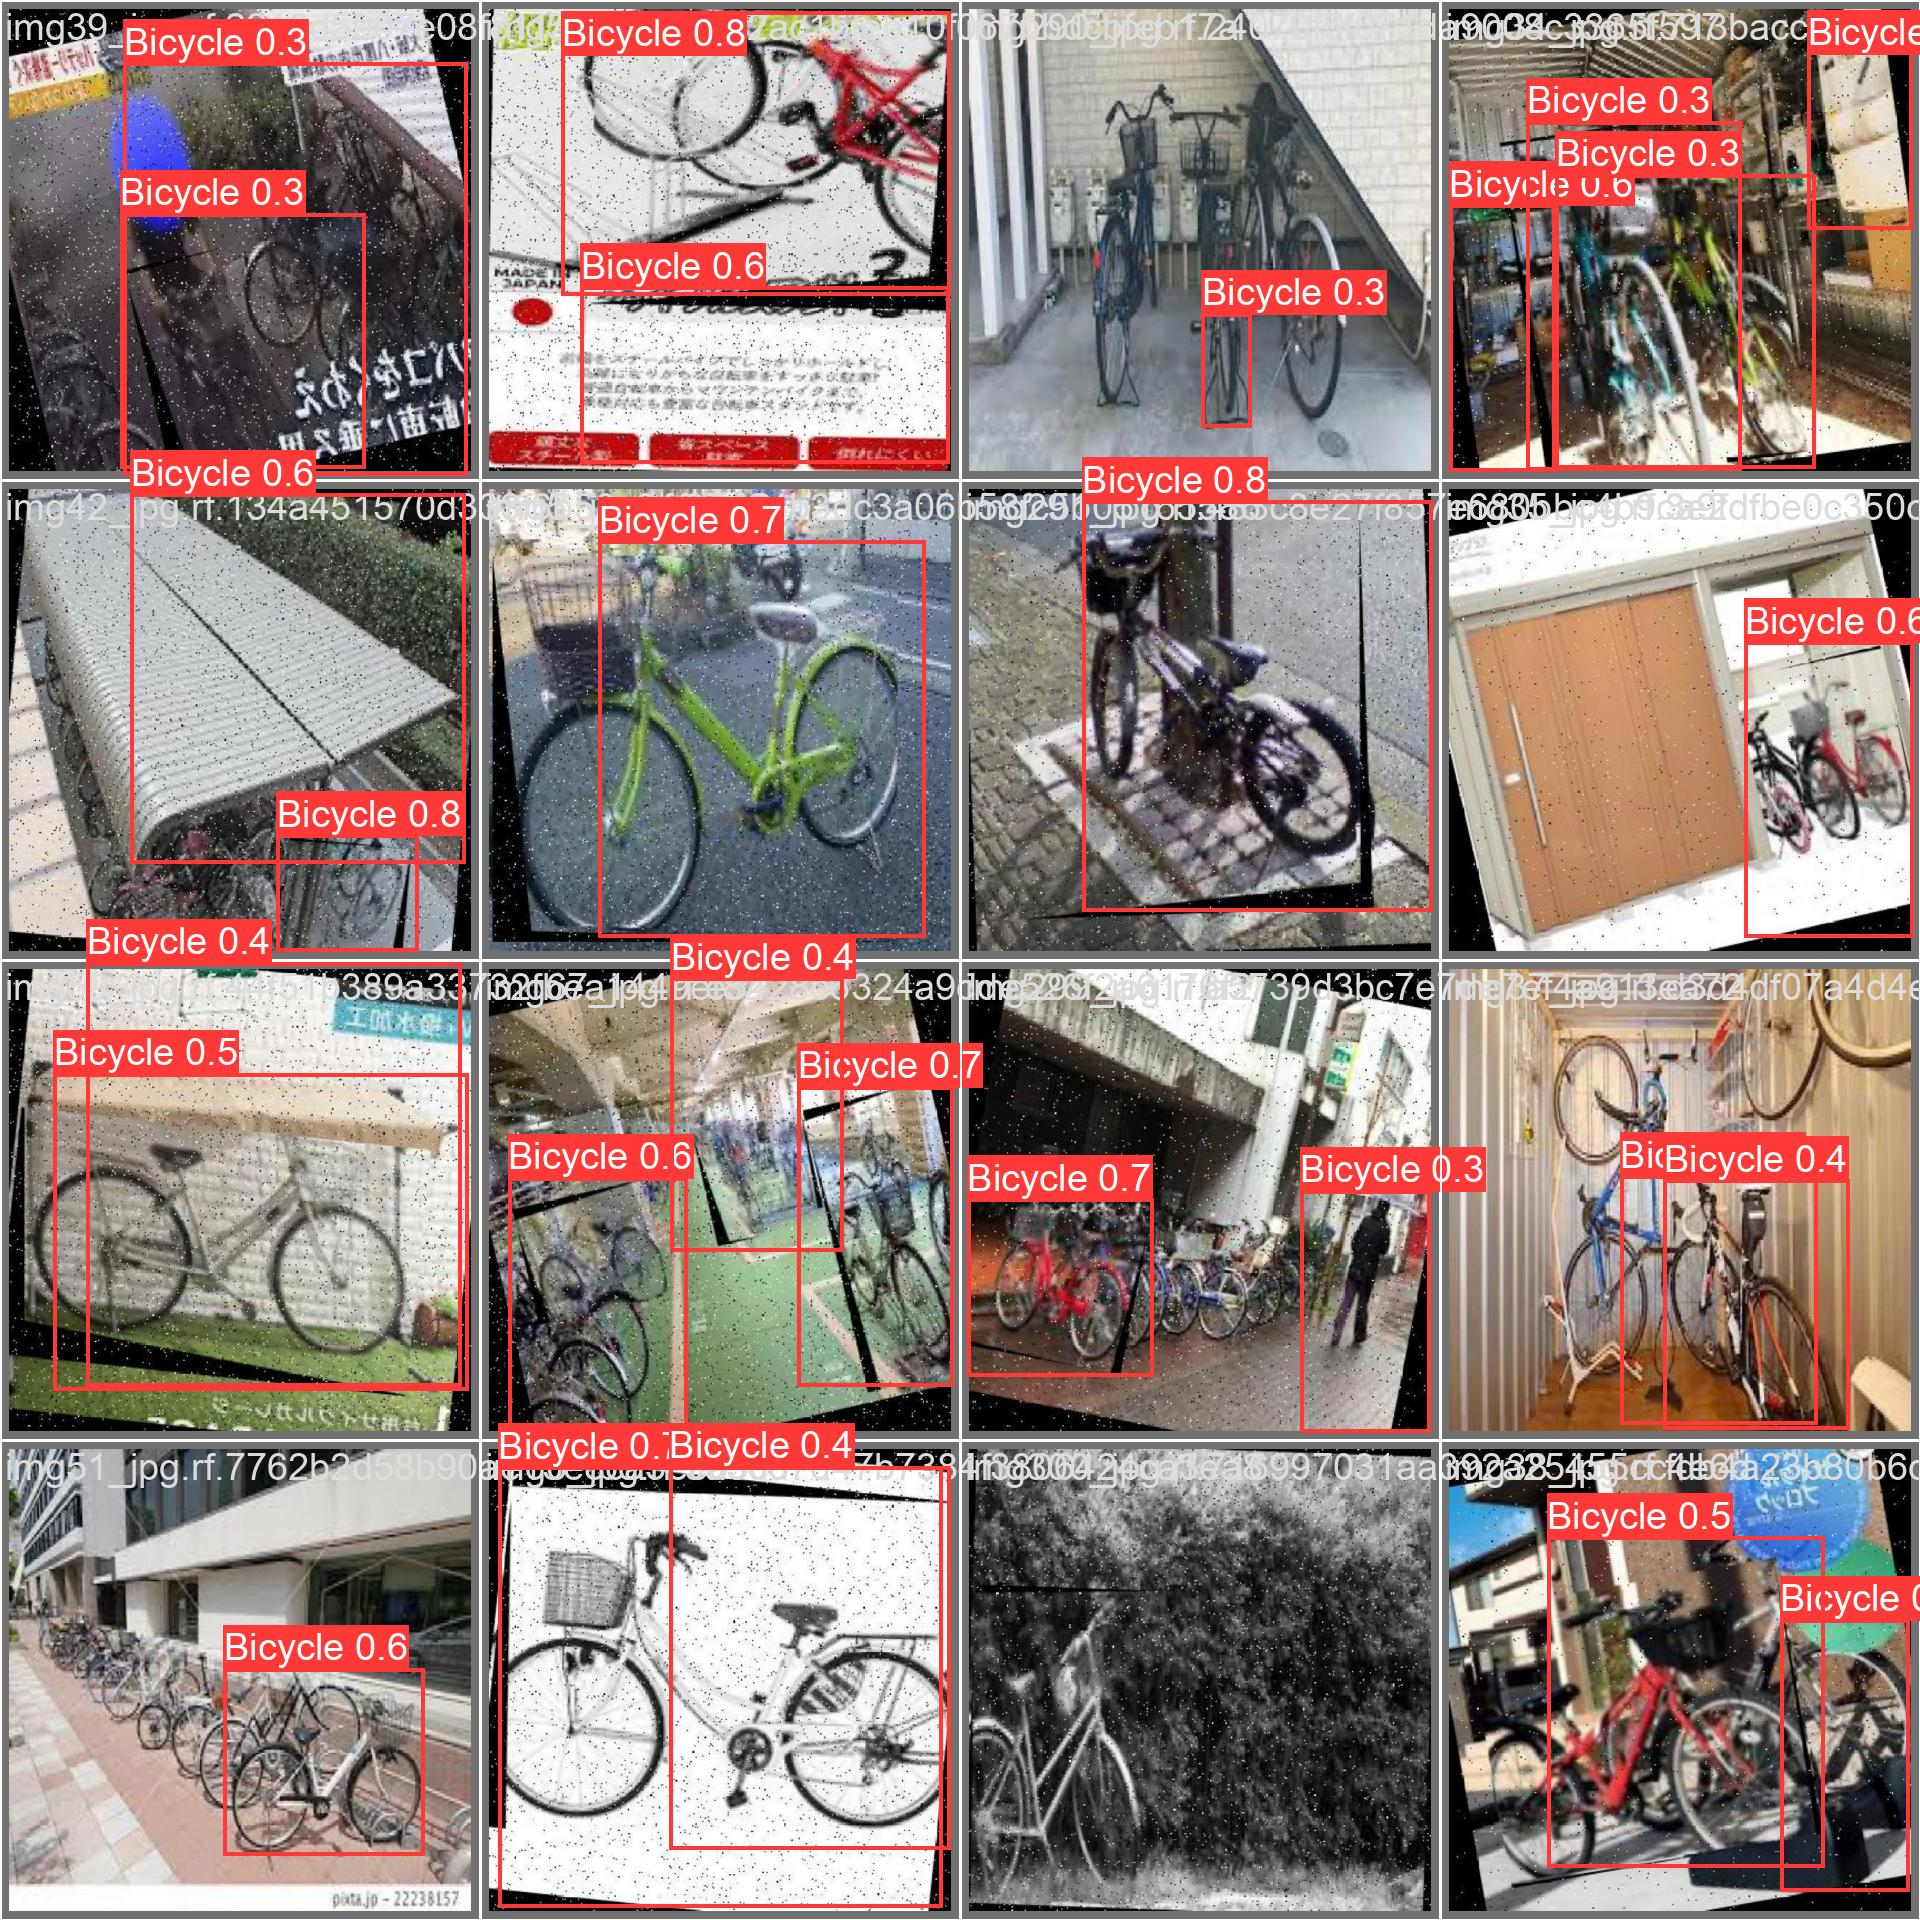

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/CIS-515-Final-Project-1/valid/labels.cache... 494 images, 0 backgrounds, 0 corrupt: 100% 494/494 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:05<00:00,  5.24it/s]
                   all        494        690      0.916      0.838      0.905      0.565
               Bicycle        494        536      0.864      0.642      0.798      0.496
             E-scooter        494         69      0.905      0.884      0.929      0.624
            Skateboard        494     

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/275 /content/datasets/CIS-515-Final-Project-1/test/images/00000900_jpg.rf.c919d30b2a9c93bf7b4c4096599c7dce.jpg: 800x800 (no detections), 7.5ms
image 2/275 /content/datasets/CIS-515-Final-Project-1/test/images/00000930_jpg.rf.be506008331580636d0e10a8be15e2e9.jpg: 800x800 1 E-scooter, 7.9ms
image 3/275 /content/datasets/CIS-515-Final-Project-1/test/images/00000946_jpg.rf.3946e29a7303a6ee14ee5c9447ad31bc.jpg: 800x800 2 E-scooters, 7.8ms
image 4/275 /content/datasets/CIS-515-Final-Project-1/test/images/00000951_jpg.rf.950e7d9b51ad8ab3d8355270aa39d394.jpg: 800x800 1 Bicycle, 1 E-scooter, 7.2ms
image 5/275 /content/datasets/CIS-515-Final-Project-1/test/images/00001026_jpg.rf.dcca6017f12e9d79afb4bf869a433dbd.jpg: 800x800 1 E-scooter, 7.4ms
image 6/275 /content/datasets/CIS-515-Final-Project-1/tes

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/runs/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/escooter.jpg

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/escooter.jpg: 768x800 1 E-scooter, 132.3ms
Speed: 11.1ms preprocess, 132.3ms inference, 588.8ms postprocess per image at shape (1, 3, 768, 800)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


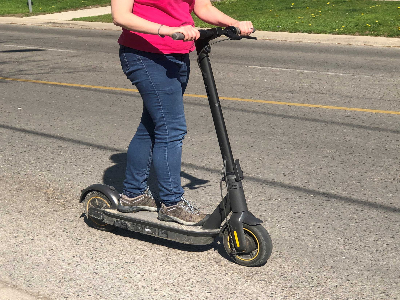

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/escooter.jpg'  # Replace 'your_image.jpg' with the path to your JPEG image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:
    # Define the desired width and height
    desired_width = 400  # Adjust the width as needed
    desired_height = 300  # Adjust the height as needed

    # Resize the image
    resized_image = cv2.resize(image, (desired_width, desired_height))

    # Display the resized image
    cv2_imshow(resized_image)
else:
    print("Error: Unable to load the image.")

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/runs/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/skateboard.jpg

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/skateboard.jpg: 800x576 2 Skateboards, 131.4ms
Speed: 9.0ms preprocess, 131.4ms inference, 582.7ms postprocess per image at shape (1, 3, 800, 576)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


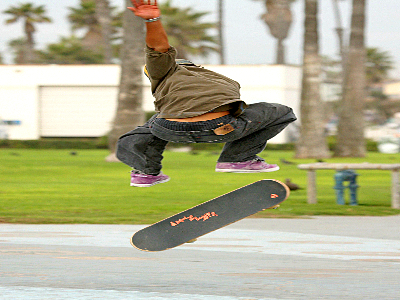

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/skateboard.jpg'  # Replace 'your_image.jpg' with the path to your JPEG image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:
    # Define the desired width and height
    desired_width = 400  # Adjust the width as needed
    desired_height = 300  # Adjust the height as needed

    # Resize the image
    resized_image = cv2.resize(image, (desired_width, desired_height))

    # Display the resized image
    cv2_imshow(resized_image)
else:
    print("Error: Unable to load the image.")

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/runs/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/skateboard2.jpg

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/skateboard2.jpg: 448x800 1 Skateboard, 138.1ms
Speed: 7.7ms preprocess, 138.1ms inference, 489.3ms postprocess per image at shape (1, 3, 448, 800)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


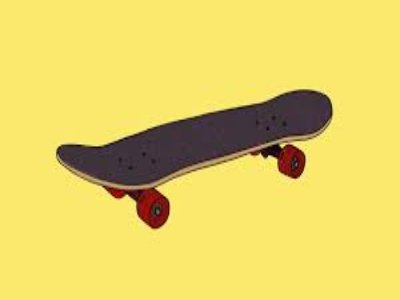

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/skateboard2.jpg'  # Replace 'your_image.jpg' with the path to your JPEG image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:
    # Define the desired width and height
    desired_width = 400  # Adjust the width as needed
    desired_height = 300  # Adjust the height as needed

    # Resize the image
    resized_image = cv2.resize(image, (desired_width, desired_height))

    # Display the resized image
    cv2_imshow(resized_image)
else:
    print("Error: Unable to load the image.")

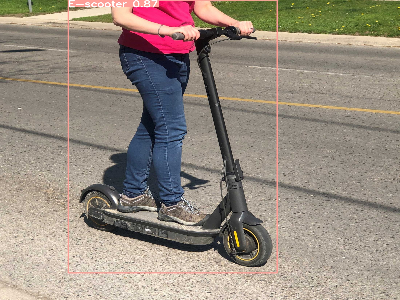

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/drive/MyDrive/runs/content/runs/detect/predict2/escooter.jpg'  # Replace 'your_image.jpg' with the path to your JPEG image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:
    # Define the desired width and height
    desired_width = 400  # Adjust the width as needed
    desired_height = 300  # Adjust the height as needed

    # Resize the image
    resized_image = cv2.resize(image, (desired_width, desired_height))

    # Display the resized image
    cv2_imshow(resized_image)
else:
    print("Error: Unable to load the image.")



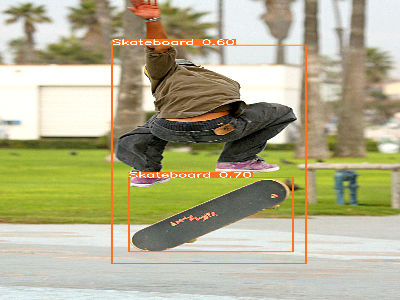

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/runs/detect/predict5/skateboard.jpg'  # Replace 'your_image.jpg' with the path to your JPEG image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:
    # Define the desired width and height
    desired_width = 400  # Adjust the width as needed
    desired_height = 300  # Adjust the height as needed

    # Resize the image
    resized_image = cv2.resize(image, (desired_width, desired_height))

    # Display the resized image
    cv2_imshow(resized_image)
else:
    print("Error: Unable to load the image.")



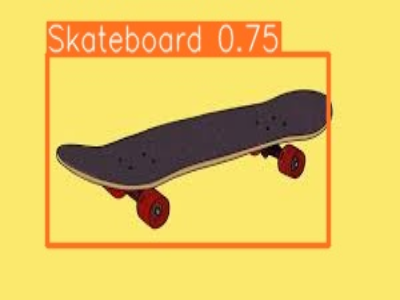

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/runs/detect/predict4/skateboard2.jpg'  # Replace 'your_image.jpg' with the path to your JPEG image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:
    # Define the desired width and height
    desired_width = 400  # Adjust the width as needed
    desired_height = 300  # Adjust the height as needed

    # Resize the image
    resized_image = cv2.resize(image, (desired_width, desired_height))

    # Display the resized image
    cv2_imshow(resized_image)
else:
    print("Error: Unable to load the image.")

